# <font color=f2a900>Bitcoin Price Analysis

![](https://bitcoin.org/img/icons/logotop.svg?1648897668)

### Group 32 Members:

Burak İnkaya\
Yiğit Beken\
Muammer Yücel Şahin\
Alp Ahmet Çebi


## Introduction

Nowadays, Crypto-currencies are as important as the Old World’s traditional currencies. They are commonly used in multiple areas by all classes of people. Between these Crypto-currencies which are taking over Fiat (Government-issued Currency) Currencies place, one of them wriggles out, Bitcoin. Bitcoin has most of the dominance of the crypto-market. To assume its value, people use a lot of metrics. As a group we decided to analyze these metrics and conclude them in a single database.

## Utilized Datasets

The dataset we are using is the <font color=f2a900>***Bitcoin Dataset 2013-2021***</font> that can be found at [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory)

We will now describe the features of the data set we will be using for easier understanding for the remainder of the analysis.
####Feautres and Their Definitions:
1. High: Highest price the Bitcoin achieved in a given time frame.
2. Low: Lowest price the Bitcoin achieved in a given time frame.
3. Open: Opening price of Bitcoin at the start of the time frame.
4. Close: Closing price of Bitcoin at the start of the time frame.
5. Volume: Volume measures how many times a coin changes hands over a given time frame.
6. Marketcap: Total value of all the coins that have been mined.
7. Date: Date and time at which attribute concerning the Bitcoin is affected. 
8. Symbol: BTC, name of the cryptocurrency.
9. BTC: Bitcoin, the first decentralized cryptocurrency.



In this part we'll summarize the most dataset we are utilizing and we'll be making a dataframe to create it less demanding to work on the dataset.

We'll start by opening our files directly from google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing necessary libraries.

In [ ]:
#some useful libraries for data manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

Creating a dataframe from the csv file "data.csv" and checking the data types of each column one by one.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/coin_Bitcoin.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


Next, let's see the statictical properties of the numerical values such as;
- High: Highest price the Bitcoin achieved in a given time frame.
- Volume: Volume measures how many times a coin changes hands over a given time frame.
- Marketcap: Total value of all the coins that have been mined.

In [ ]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


Preview of the first couple of rows from the data set.

In [ ]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


## Exploratory Data Analysis


In this part we will analyze the data, starting by ploting each feature's own line graph. Next we will be ploting correlation graphs and matrixes to comment on the correlation of the features. After that we will be analyzing and comparing them.

### Visualizations of Descriptive Statistics

Take the columns one by one and assign them into appropriate variables

In [ ]:
SNo = df["SNo"]
Name = df["Name"]
Symbol = df["Symbol"]
Date = df["Date"]
High = df["High"]
Low = df["Low"]
Open = df["Open"]
Close = df["Close"]
Volume = df["Volume"]
Marketcap = df["Marketcap"]

and plot them.

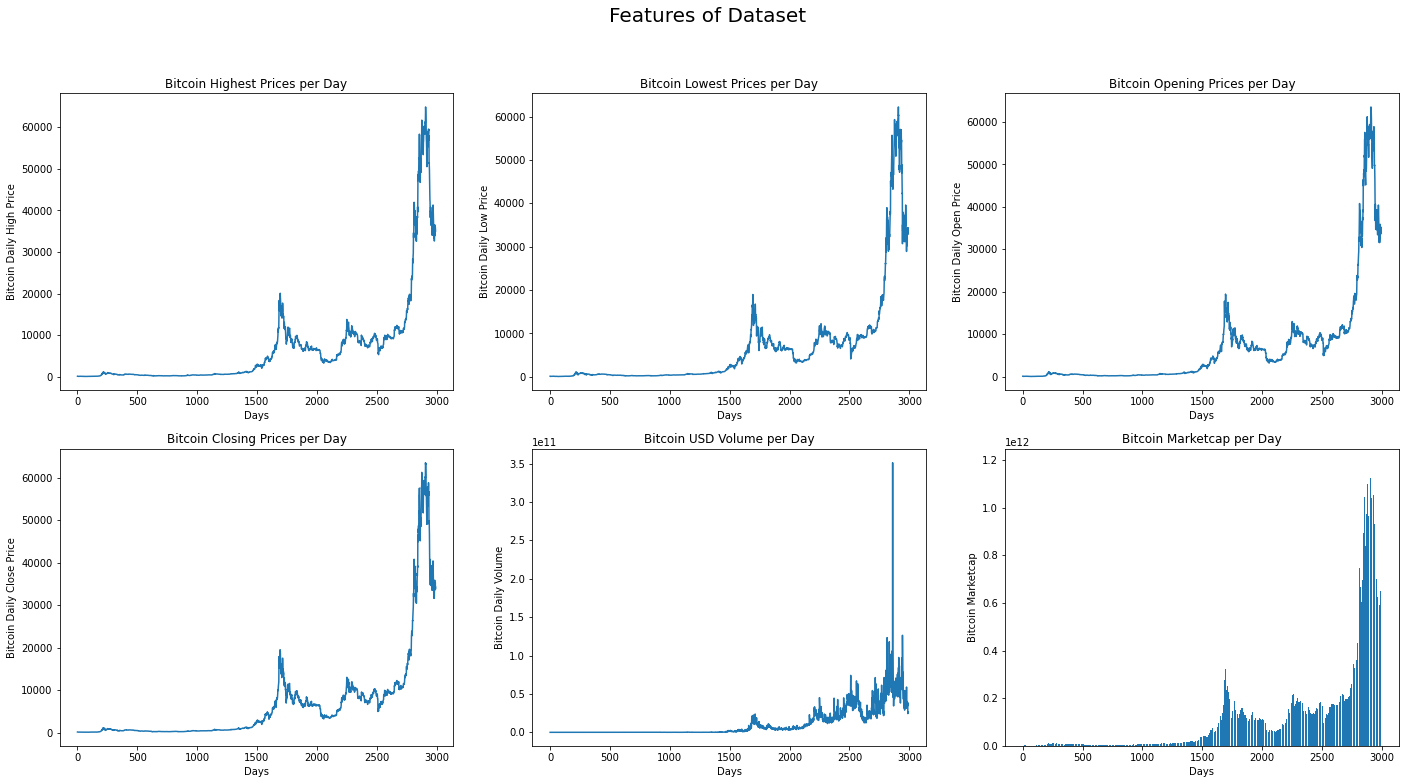

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(24, 12))
fig.suptitle('Features of Dataset', fontsize=20)

ax[0][0].plot(SNo,High)
ax[0][0].set_xlabel("Days")
ax[0][0].set_title("Bitcoin Highest Prices per Day")
ax[0][0].set_ylabel("Bitcoin Daily High Price")
ax[0][1].plot(SNo, Low)
ax[0][1].set_xlabel("Days")
ax[0][1].set_title("Bitcoin Lowest Prices per Day")
ax[0][1].set_ylabel("Bitcoin Daily Low Price")
ax[0][2].plot(SNo, Open)
ax[0][2].set_xlabel("Days")
ax[0][2].set_title("Bitcoin Opening Prices per Day")
ax[0][2].set_ylabel("Bitcoin Daily Open Price")
ax[1][0].plot(SNo, Close)
ax[1][0].set_xlabel("Days")
ax[1][0].set_title("Bitcoin Closing Prices per Day")
ax[1][0].set_ylabel("Bitcoin Daily Close Price")
ax[1][1].plot(SNo, Volume)
ax[1][1].set_xlabel("Days")
ax[1][1].set_title("Bitcoin USD Volume per Day")
ax[1][1].set_ylabel("Bitcoin Daily Volume")
ax[1][2].bar(SNo, Marketcap)
ax[1][2].set_xlabel("Days")
ax[1][2].set_title("Bitcoin Marketcap per Day")
ax[1][2].set_ylabel("Bitcoin Marketcap")


plt.show()

These charts show distributions of each feature in our dataset.

### Analysis of the High-Low Prices With Respect to Time/Volume




From the features given to us, we tried to graph the following;
- High-Low Prices by Time
- High-Low Prices by Volume


First lets start by creating a highest prices per day line graph.


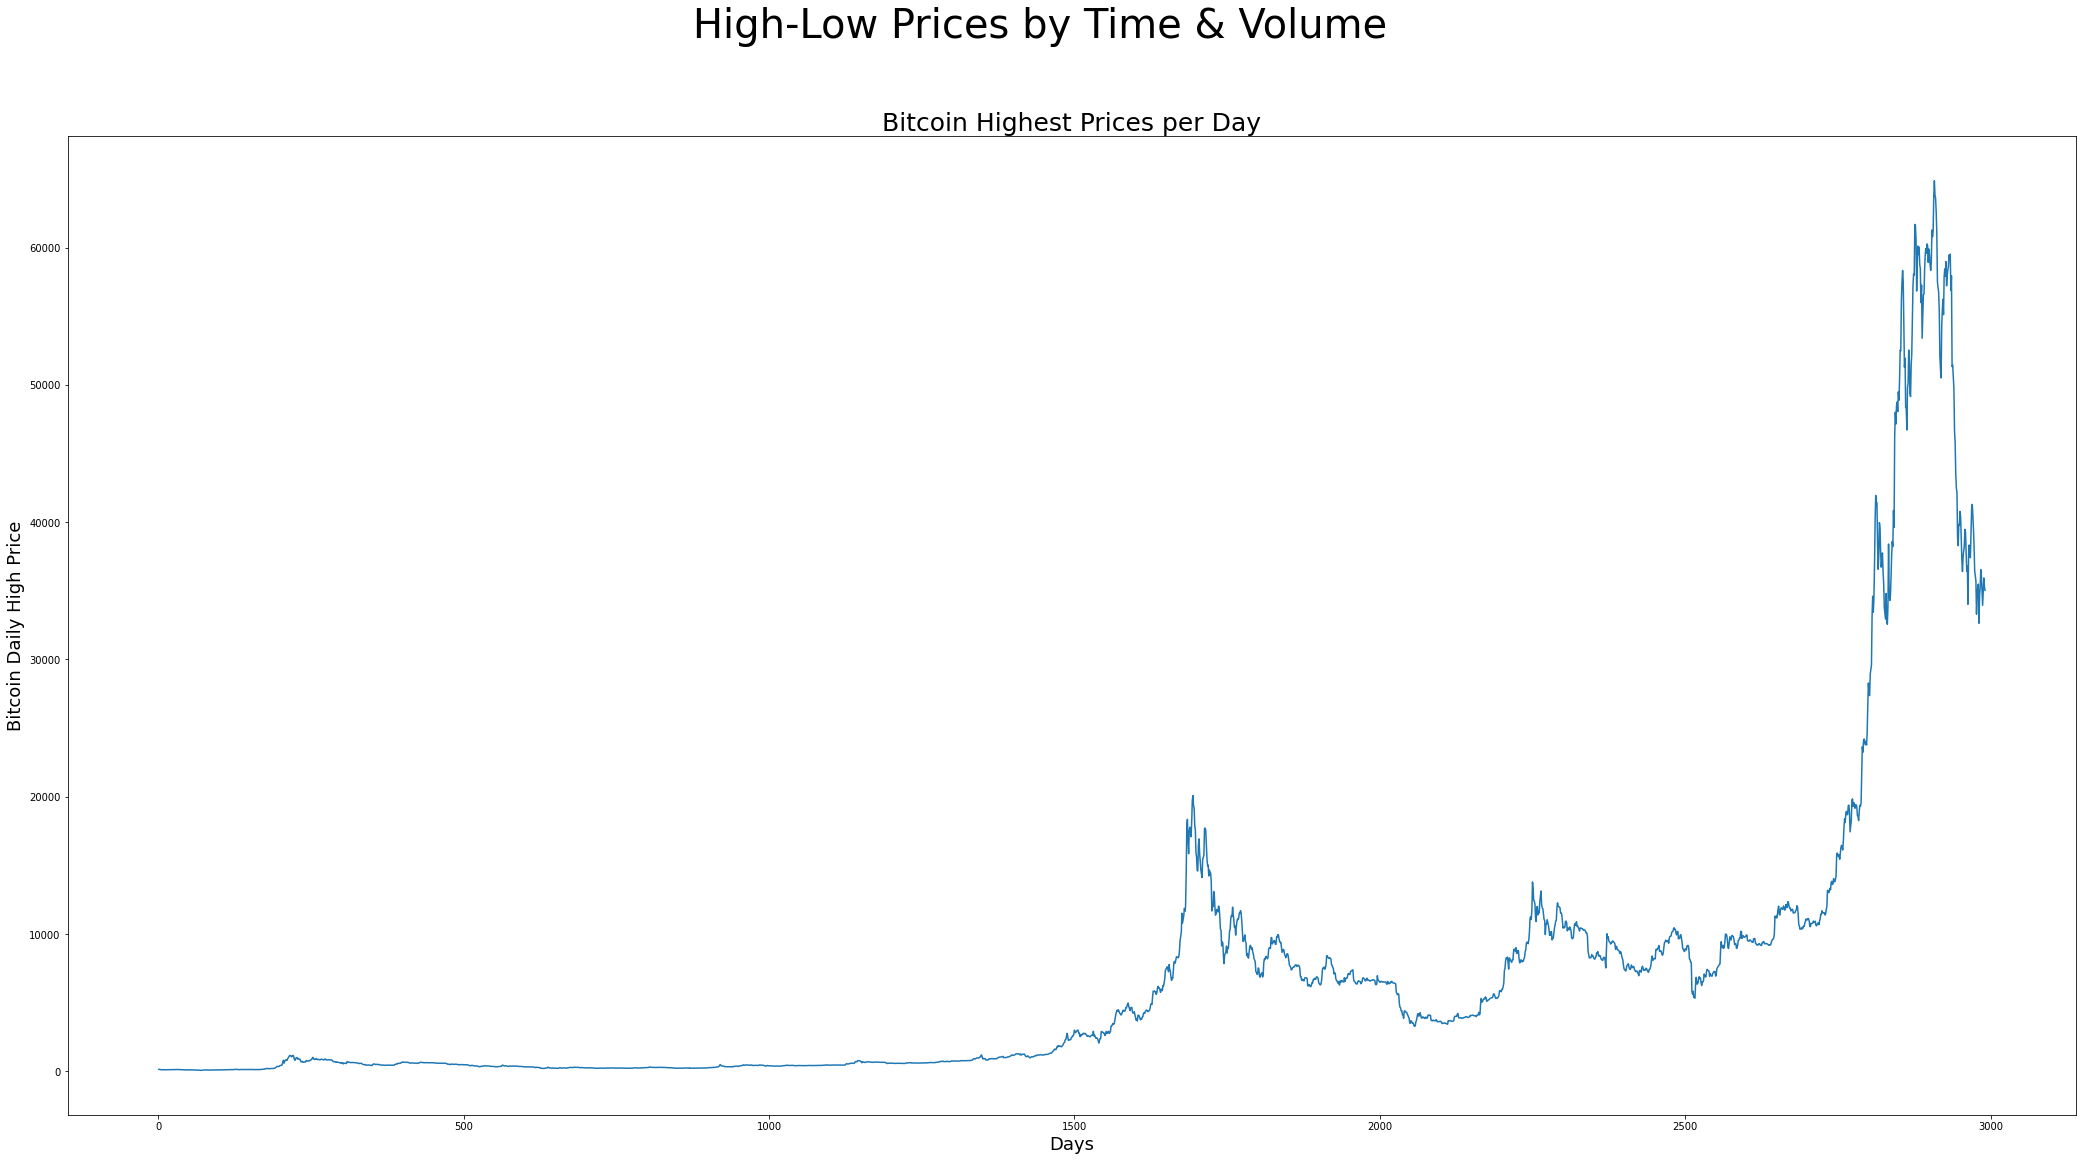

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(36, 18))
fig.suptitle('High-Low Prices by Time & Volume', fontsize=40)

axes.plot(SNo,High)
axes.set_xlabel("Days",fontsize=18)
axes.set_title("Bitcoin Highest Prices per Day",fontsize=25)
axes.set_ylabel("Bitcoin Daily High Price", fontsize=18)


plt.show()

Then, the graph for highest prices by volume.

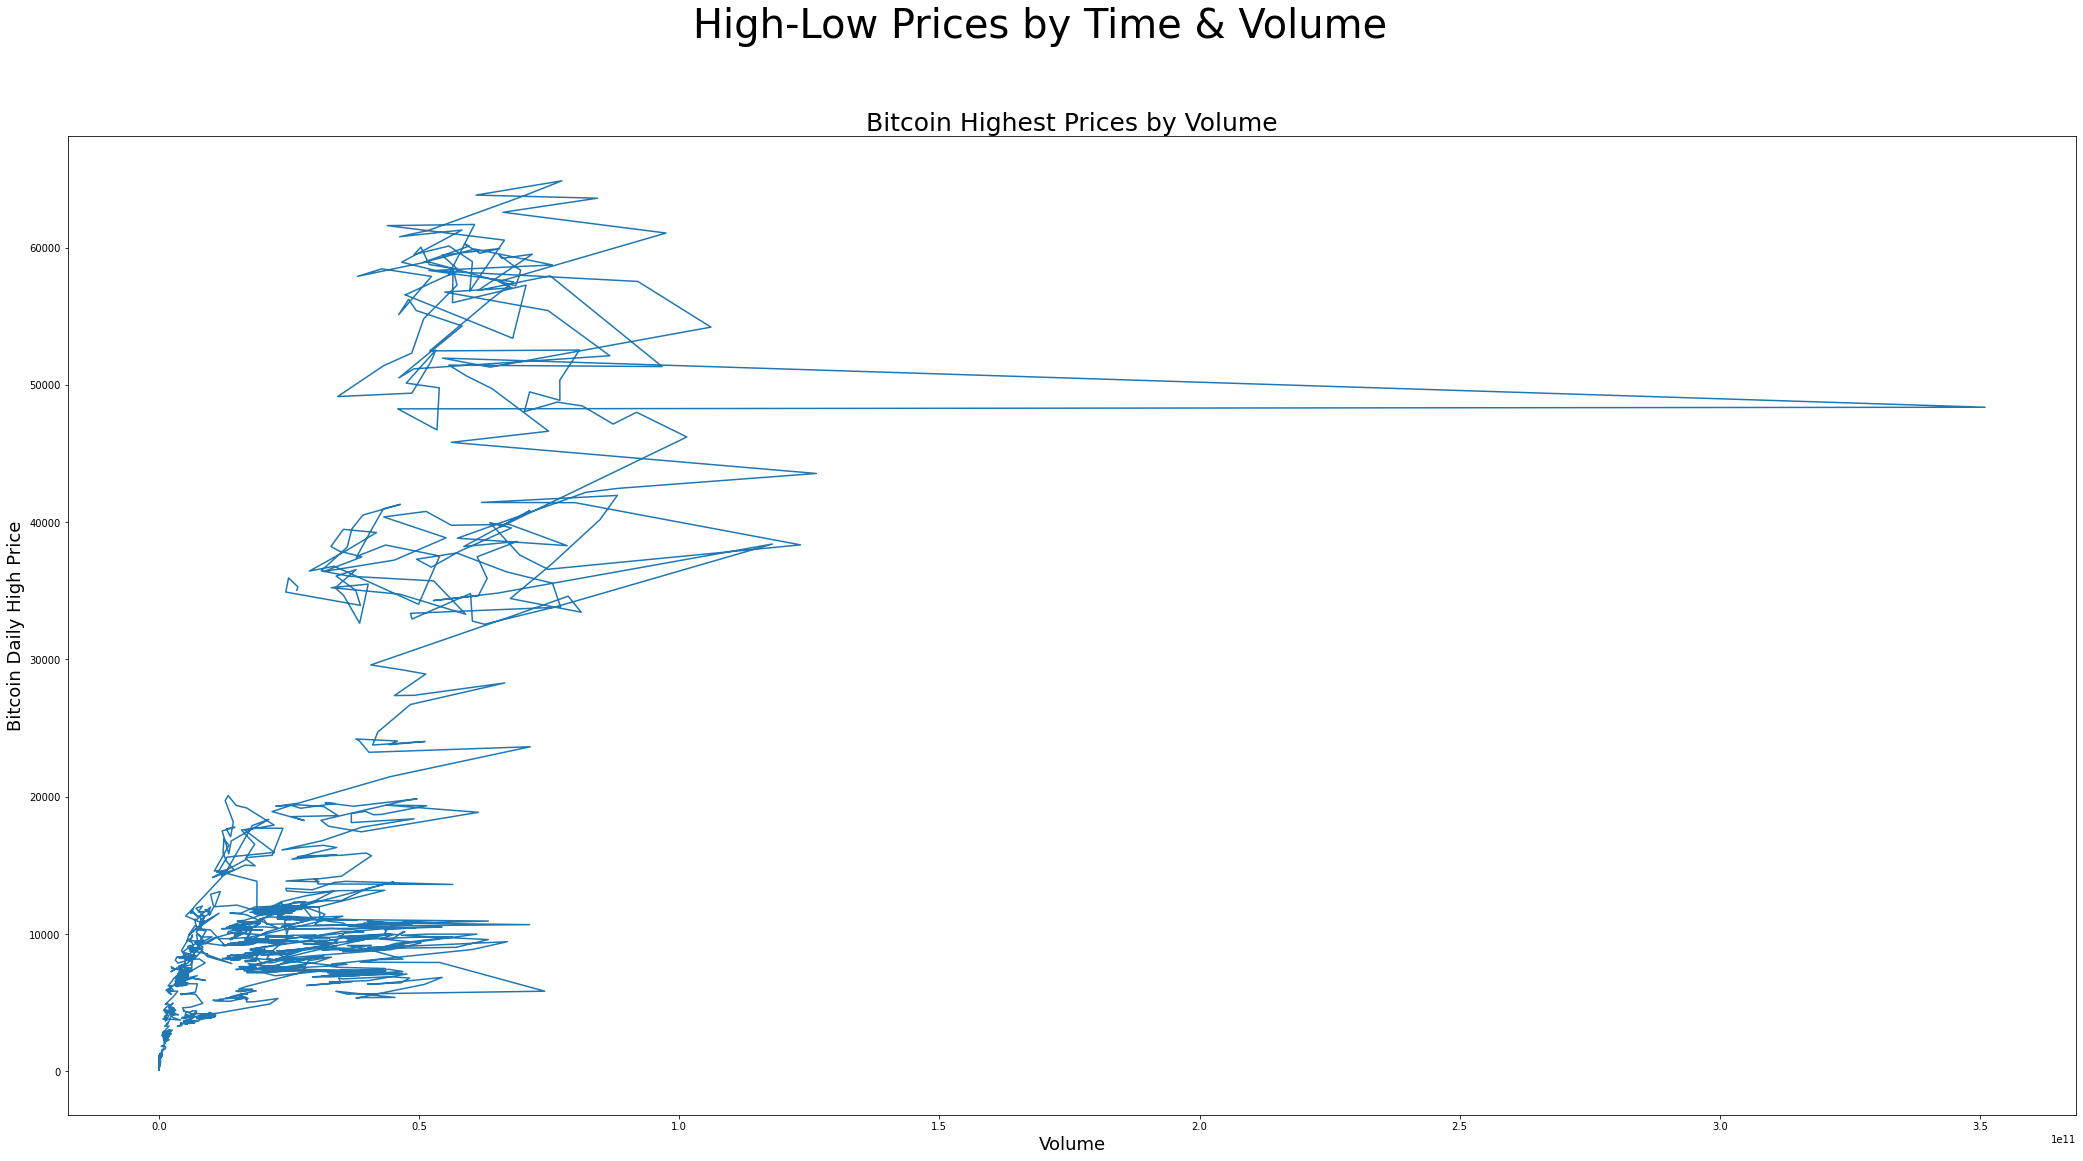

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(36, 18))
fig.suptitle('High-Low Prices by Time & Volume', fontsize=40)

axes.plot(Volume,High)
axes.set_xlabel("Volume",fontsize=18)
axes.set_title("Bitcoin Highest Prices by Volume",fontsize=25)
axes.set_ylabel("Bitcoin Daily High Price", fontsize=18)

plt.show()

Graph of lowest prices by time.

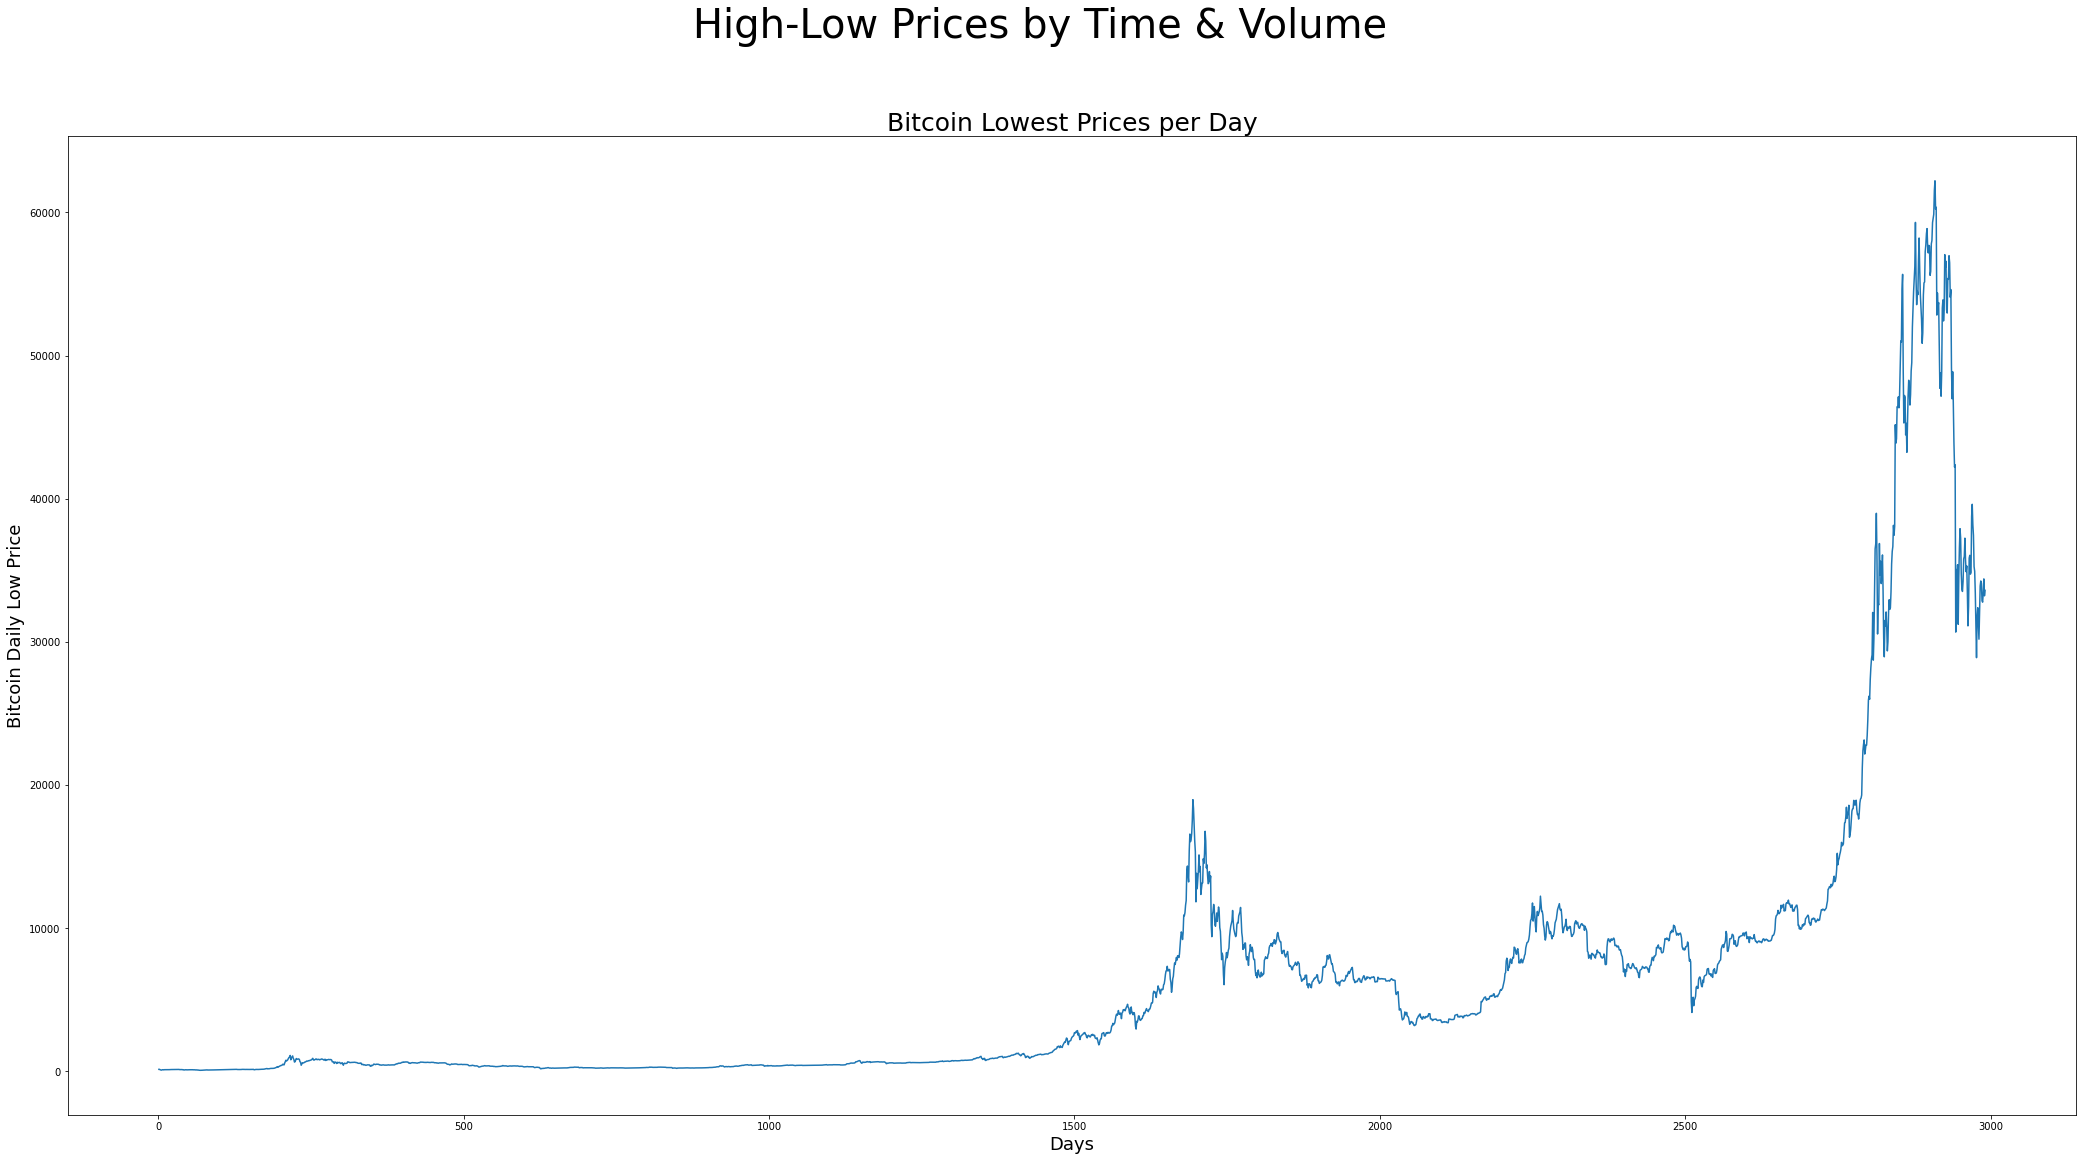

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(36, 18))
fig.suptitle('High-Low Prices by Time & Volume', fontsize=40)

axes.plot(SNo,Low)
axes.set_xlabel("Days",fontsize=18)
axes.set_title("Bitcoin Lowest Prices per Day",fontsize=25)
axes.set_ylabel("Bitcoin Daily Low Price", fontsize=18)

plt.show()

Graph of lowest prices by volume.

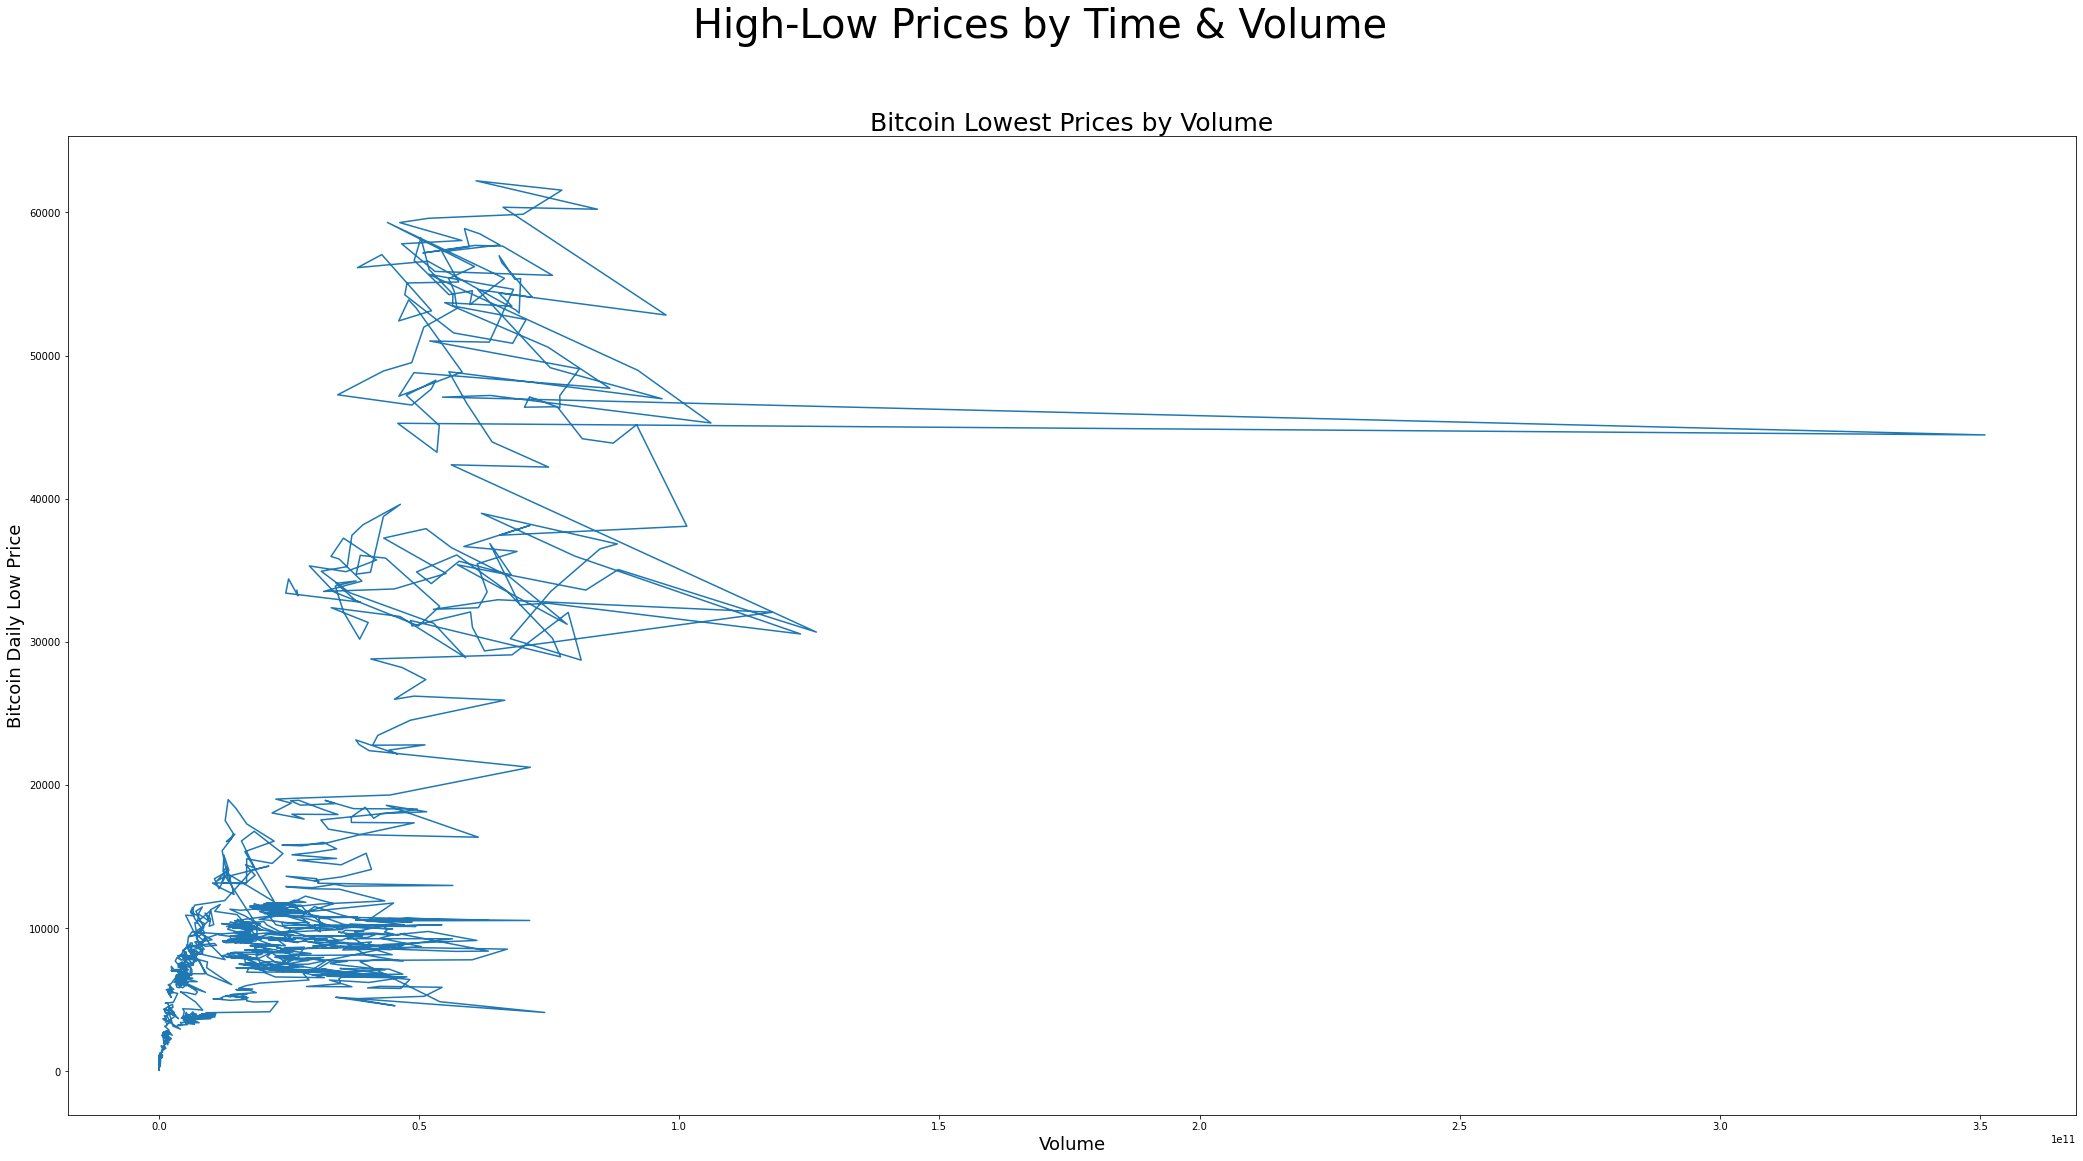

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(36, 18))
fig.suptitle('High-Low Prices by Time & Volume', fontsize=40)

axes.plot(Volume,Low)
axes.set_xlabel("Volume",fontsize=18)
axes.set_title("Bitcoin Lowest Prices by Volume",fontsize=25)
axes.set_ylabel("Bitcoin Daily Low Price", fontsize=18)

plt.show()

### Comparison of Attributes to Time

By looking at the graphs of given attributes we can make the following conclusions

*   Since BTC dont get closed for trading like regular stocks graphs of closing prices and opening prices are nearly identical.
*   Highest price and lowest price in a given time frame has a correlation.
*   There is a very strong correlation between the bitcoin marketcap and the highest/lowest prices per day.
*   There is a correlation between volatility of bitcoin and the highest-lowest prices of bitcoin.
*   Obviously the is a causation between volume and trade volume per day.




### Analysis of the Data with 4 New Features





To do this we first have added 4 new attributes to our database which are called;


*   BTC Volume
*   Total Supply
*   Volatility
*   Average Price



In [ ]:
df['BTC Volume'] = df['Volume'] / df['Close']
df['Total Supply'] = df['Marketcap'] / df['Close']
df['Volatility'] =abs(df["Close"] - df["Open"])
df['Average Price'] = (df["Open"] + df["Close"])/2

BTCVolume = df['BTC Volume']
TotalSupply = df['Total Supply']
Volatility = df['Volatility'] 
AveragePrice = df['Average Price']

We calculated trade volume by dividing the volume to closing price of the given time frame.

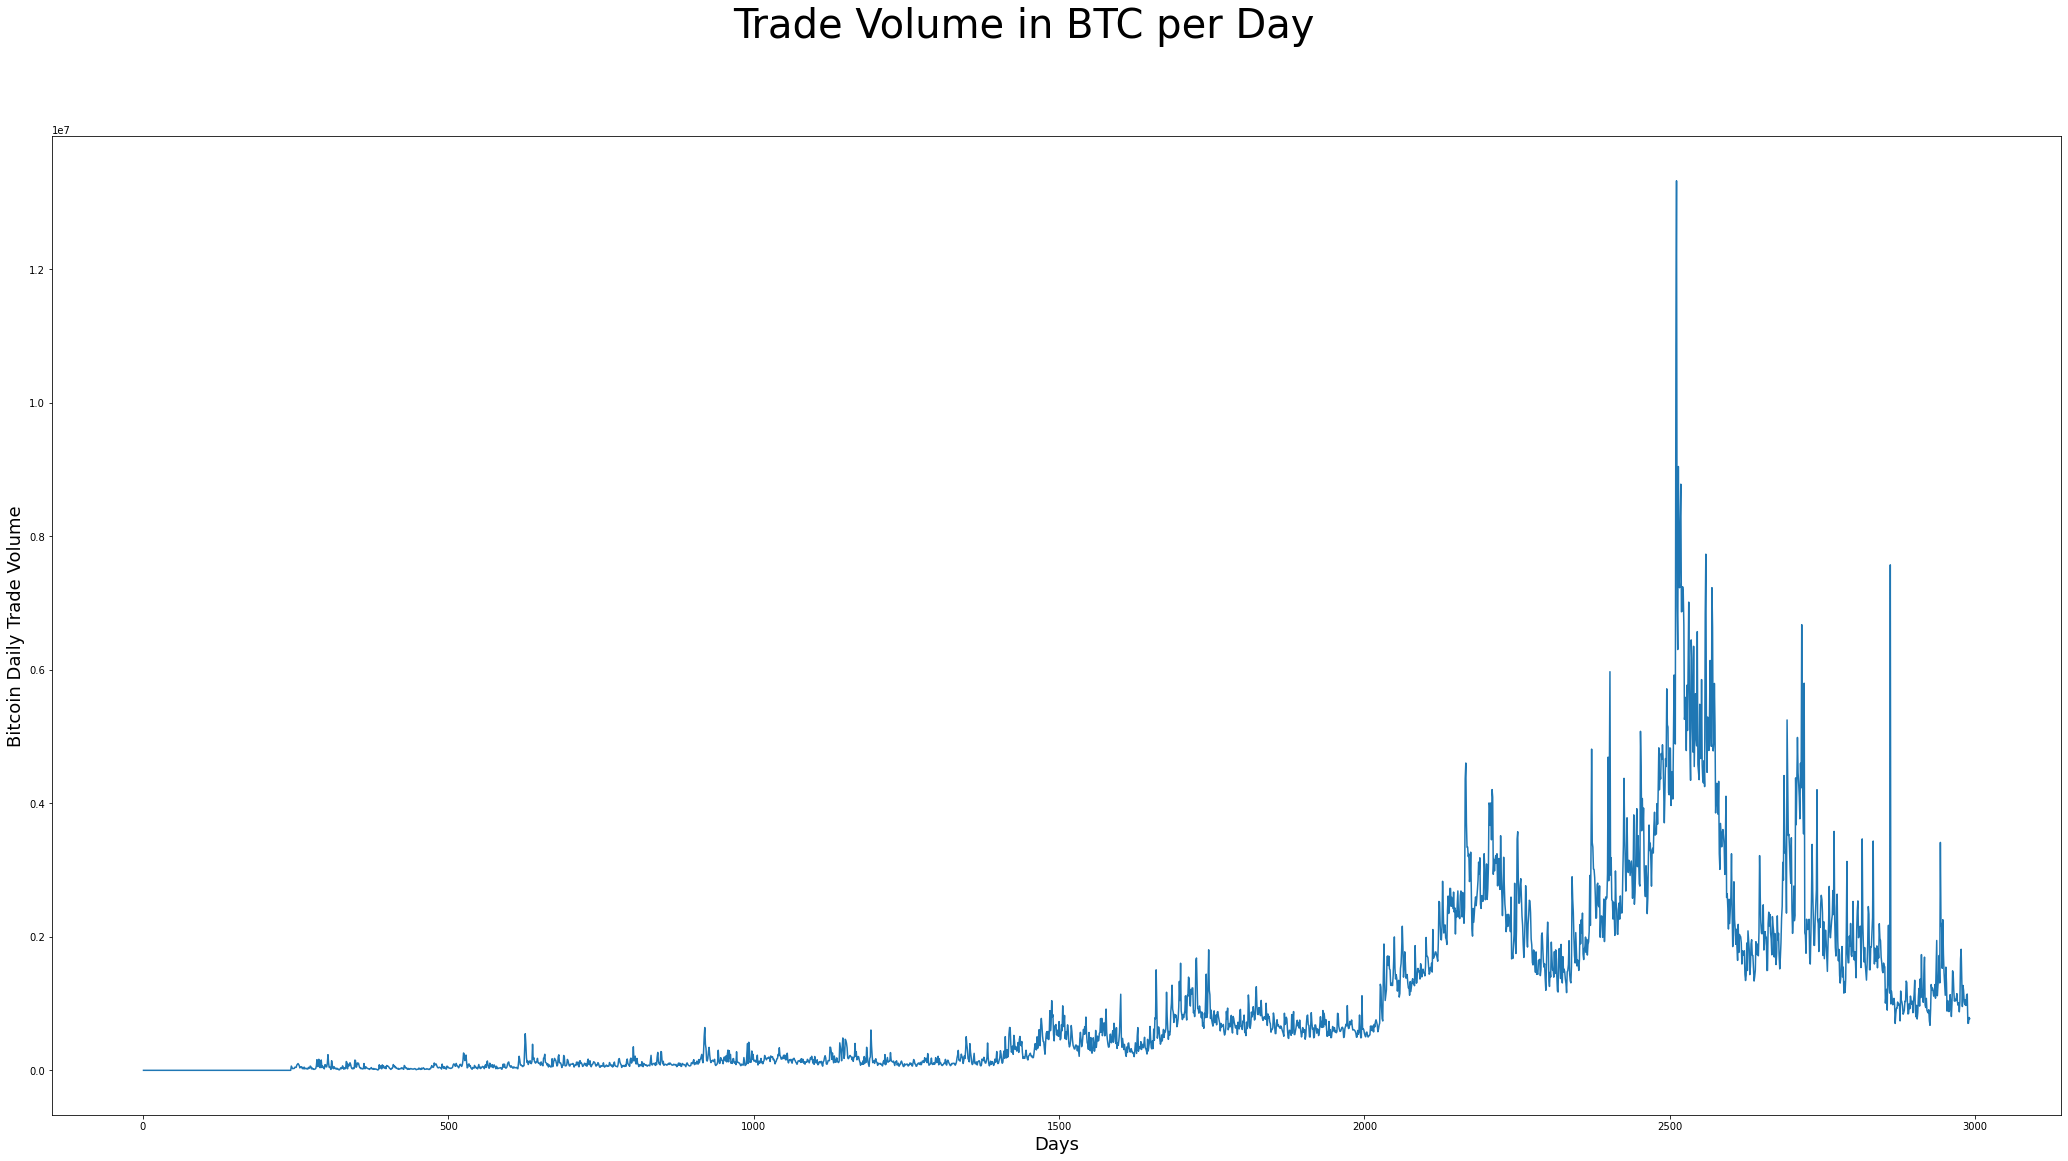

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(36, 18))
fig.suptitle('Trade Volume in BTC per Day', fontsize=40)

axes.plot(SNo,BTCVolume)
axes.set_xlabel("Days",fontsize=18)
axes.set_ylabel("Bitcoin Daily Trade Volume", fontsize=18)


plt.show()

Now we graph the total supply of bitcoin which are mined, found by dividing market cape to closing price of the given time frame.

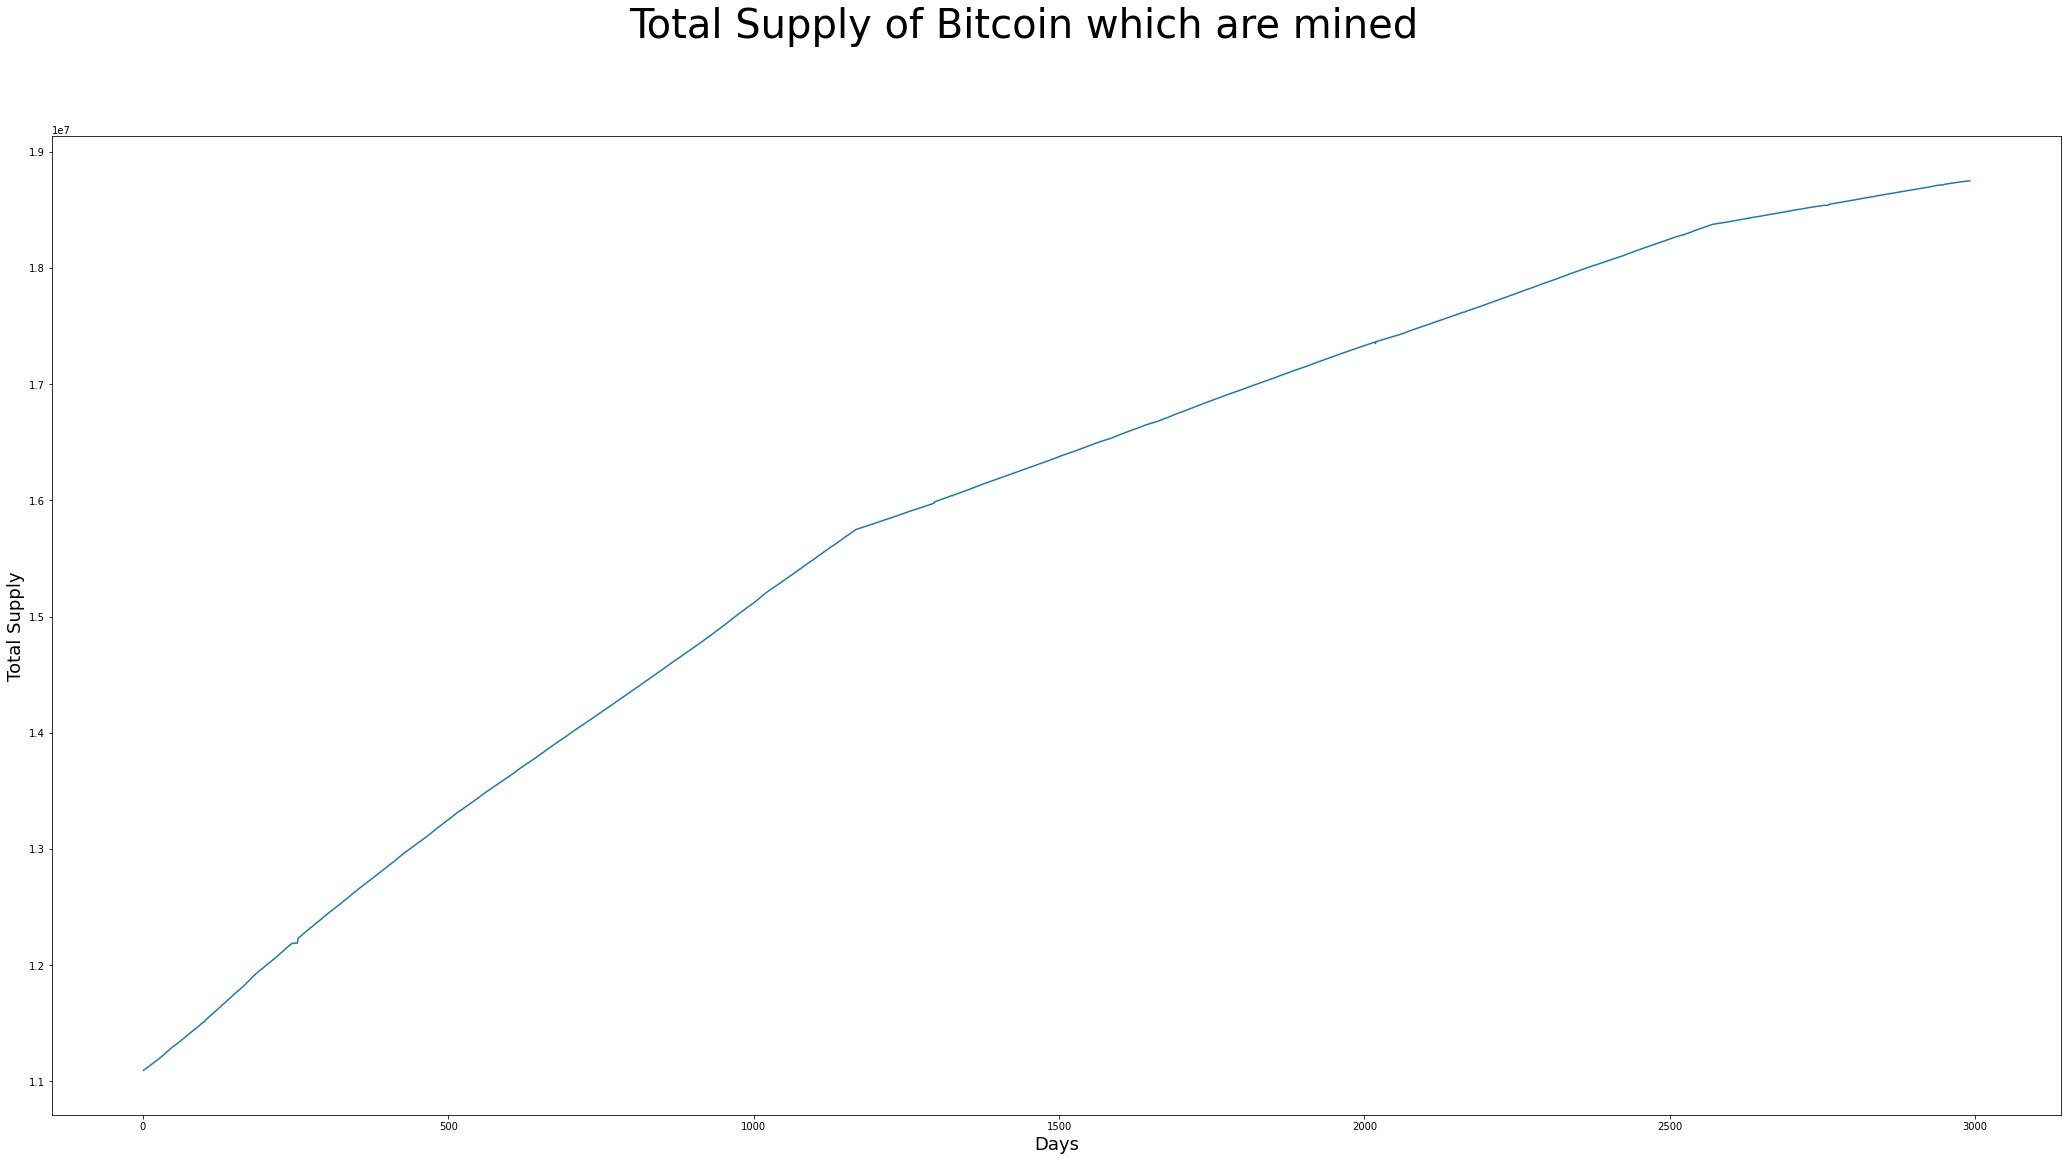

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(36, 18))
fig.suptitle('Total Supply of Bitcoin which are mined', fontsize=40)

axes.plot(SNo,TotalSupply)
axes.set_xlabel("Days",fontsize=18)
axes.set_ylabel("Total Supply", fontsize=18)


plt.show()

Following graph shows daily volatility of bitcoin, calculated by taking the absolute value after you substract opening value from the closing value.

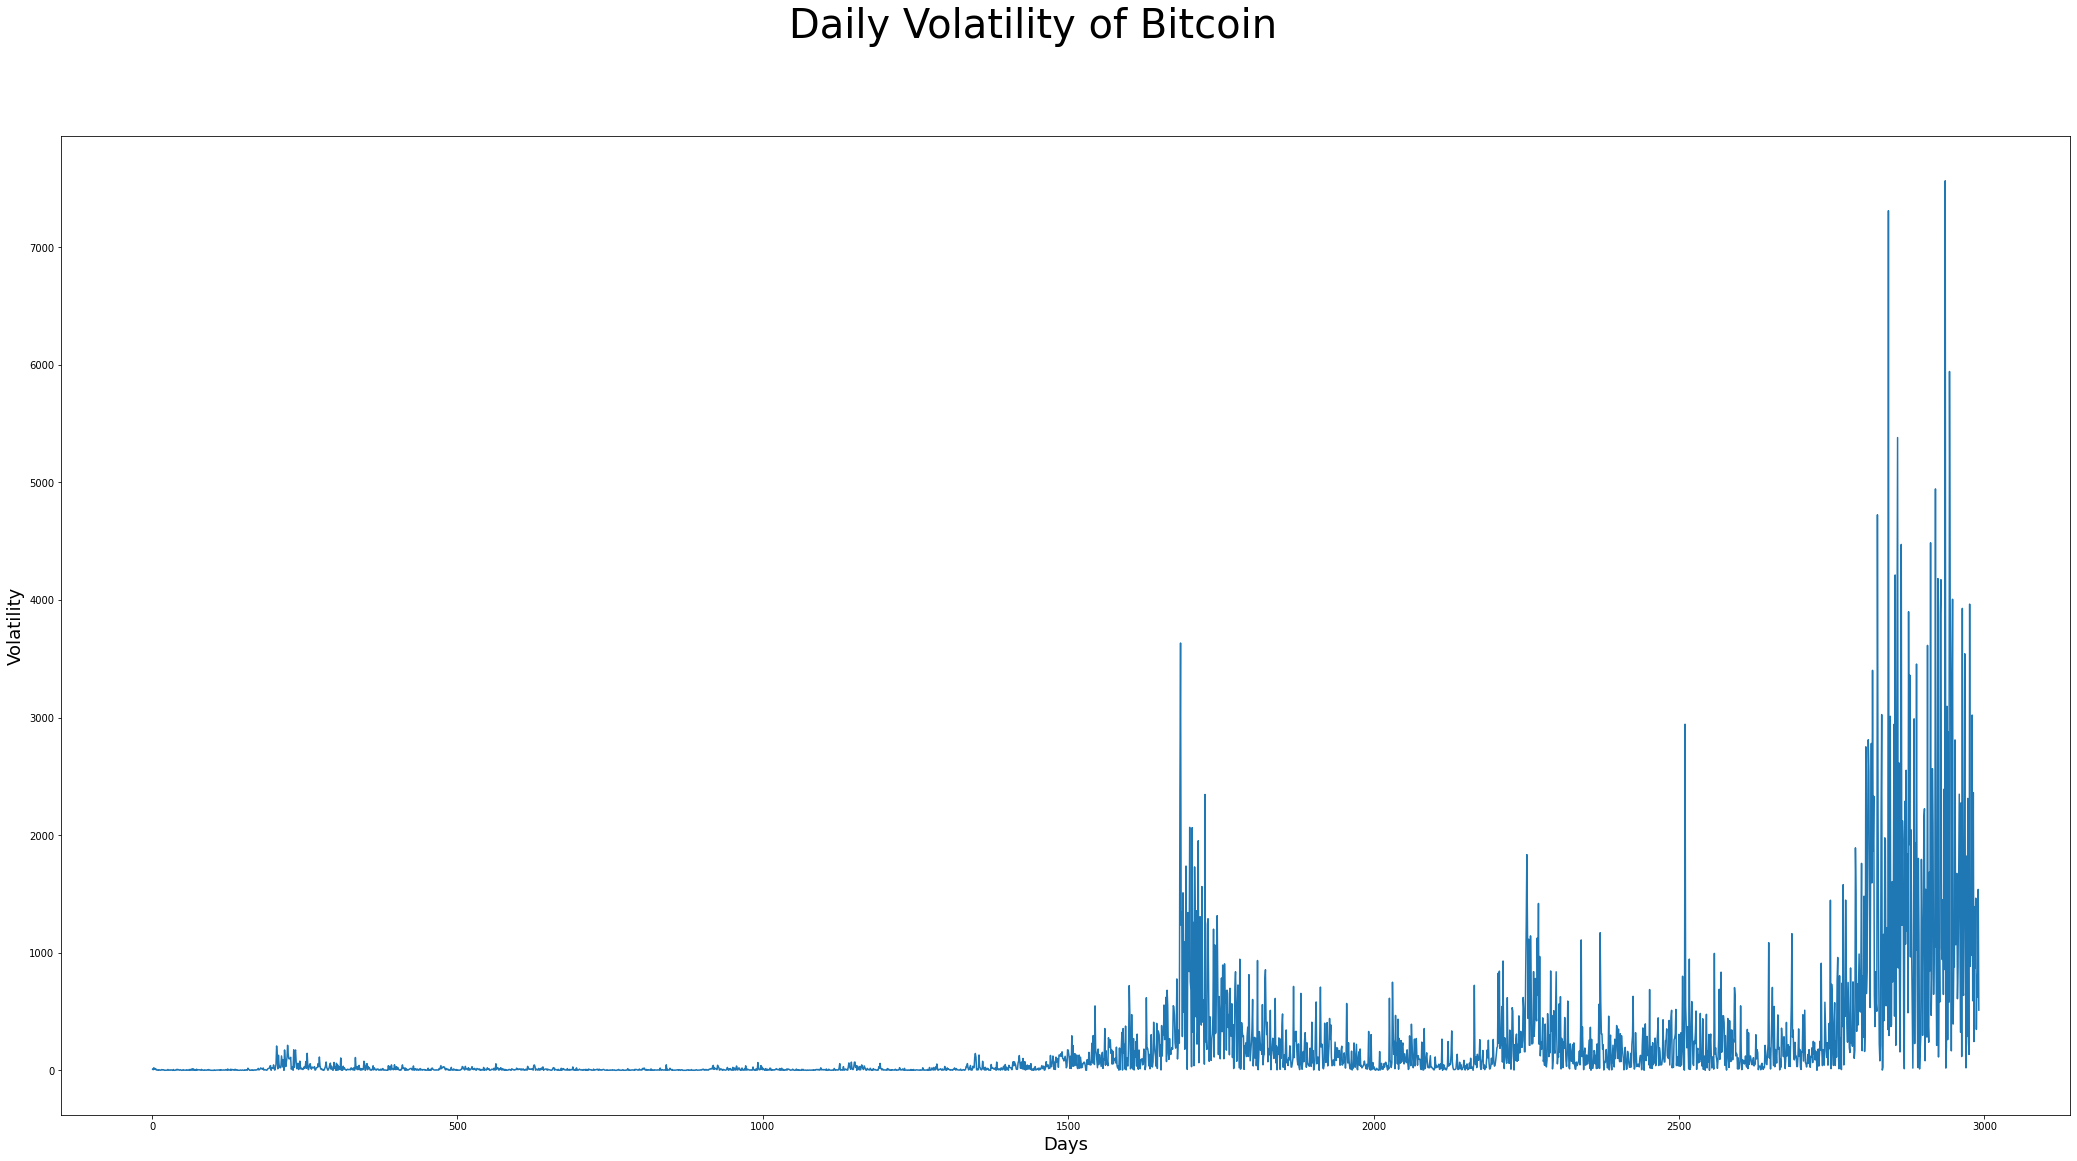

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(36, 18))
fig.suptitle('Daily Volatility of Bitcoin', fontsize=40)

axes.plot(SNo,Volatility)
axes.set_xlabel("Days",fontsize=18)
axes.set_ylabel("Volatility", fontsize=18)


plt.show()

If we add the opening price and closing price then divide them to 2, we get the daily average price of bitcoin.

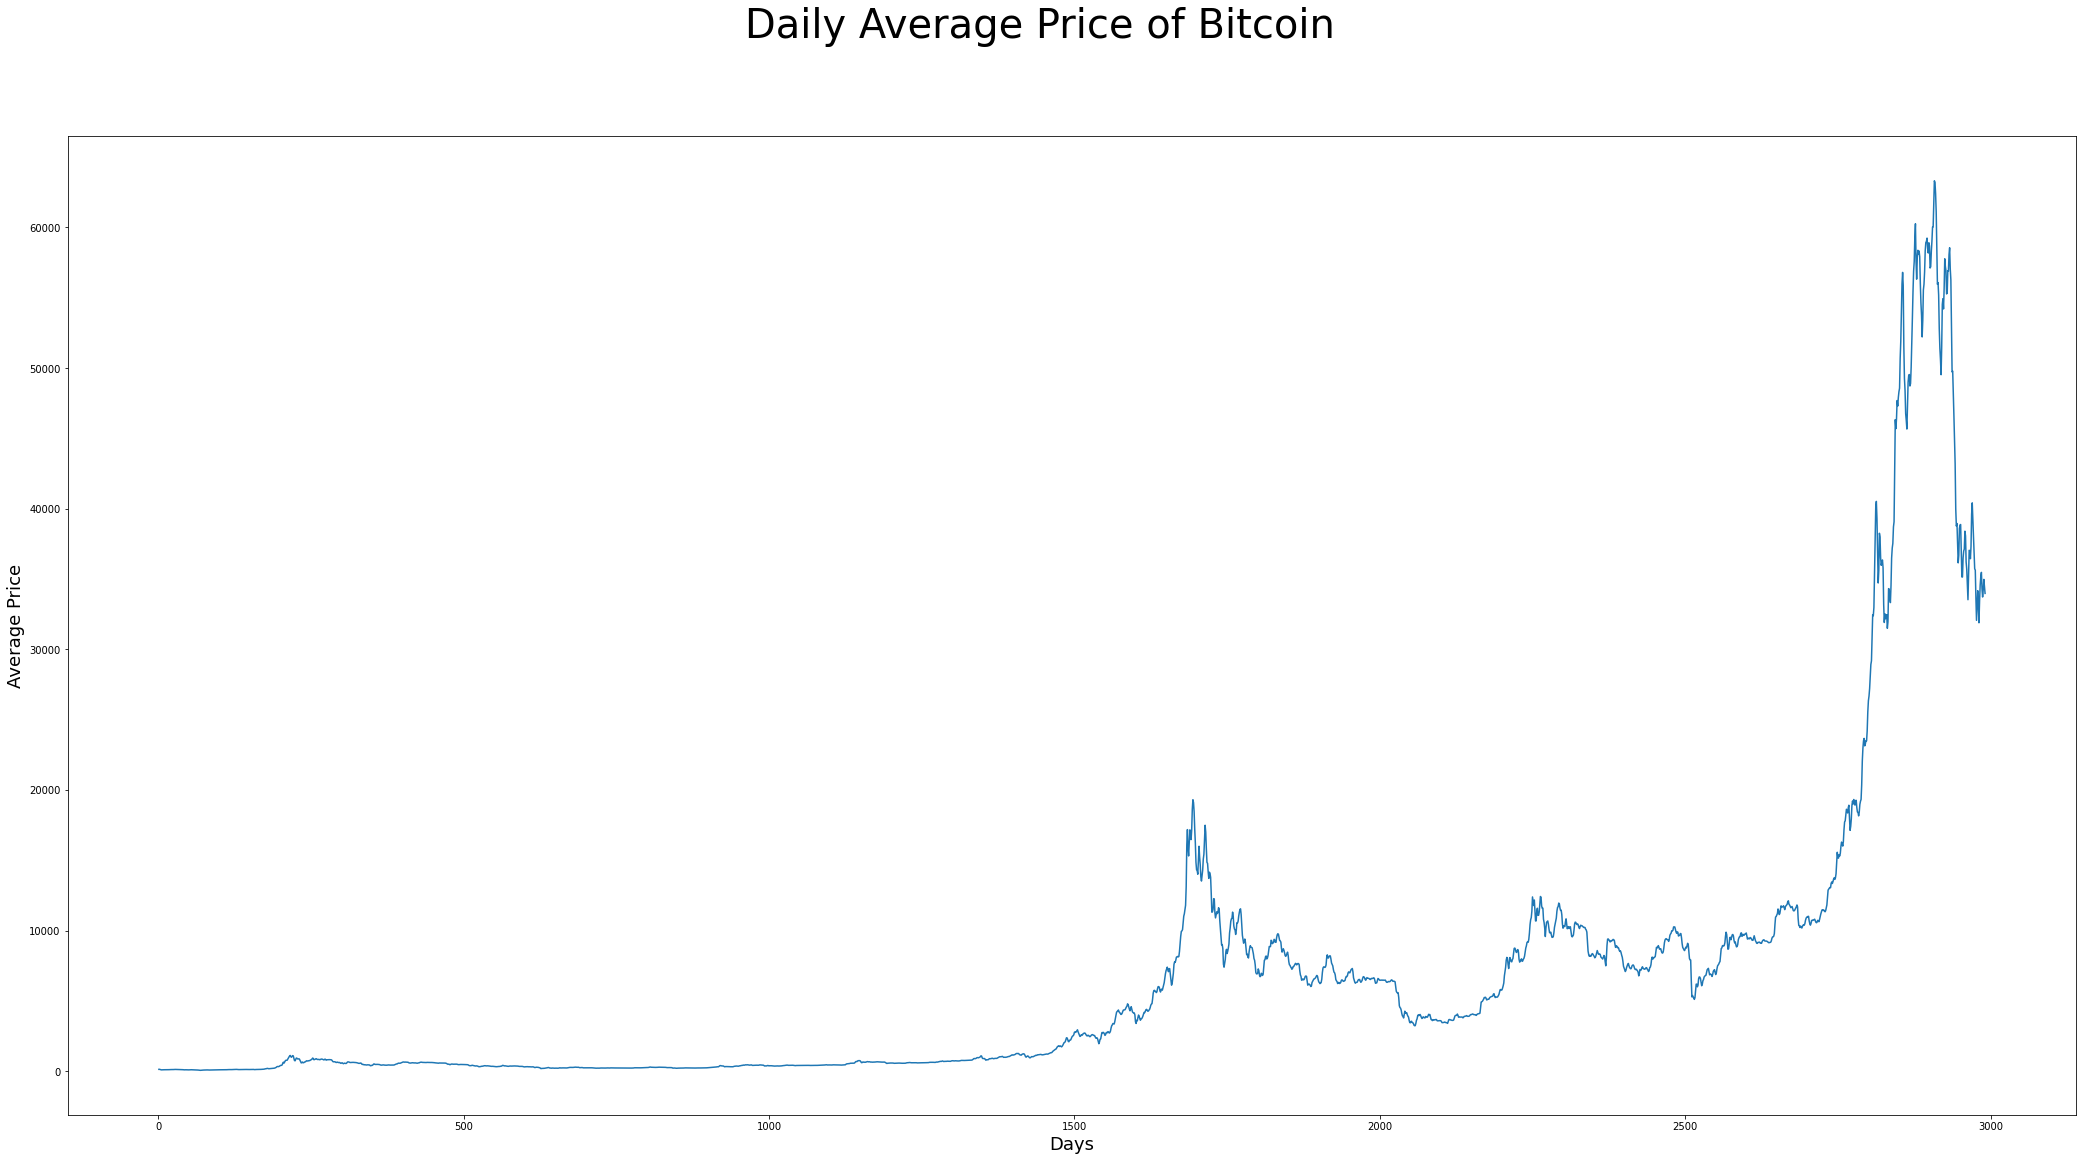

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(36, 18))
fig.suptitle('Daily Average Price of Bitcoin', fontsize=40)

axes.plot(SNo,AveragePrice)
axes.set_xlabel("Days",fontsize=18)
axes.set_ylabel("Average Price", fontsize=18)


plt.show()

In [ ]:
df_ml = df.copy()

We copied the all datasets for the Machine Learning part.

# Hypothesis Testing

In this part we are going to test if Bitcoin prices are determined by their volume.

Null Hypothesis  ($\large{H_0}$) : Price action of Bitcoin isn't determined by its volume.

Alternative Hypothesis ($\large{H_A}$): Price action of Bitcoin is determined by its volume.

First, we create 5 different lists and fill them with accordance to their volumes from our dataset.

Entries with volume smaller than 20 million.

In [ ]:
sample1 = df[df['Volume'] < 20000000]
sample1.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,BTC Volume,Total Supply,Volatility,Average Price
892,893,Bitcoin,BTC,2015-10-08 23:59:59,244.251007,242.179001,243.074997,242.304001,18515300.0,3.562238e+09,76413.513333,1.470152e+07,0.770996,242.689499
893,894,Bitcoin,BTC,2015-10-09 23:59:59,244.227997,242.121994,242.498001,243.931000,17353100.0,3.586932e+09,71139.379650,1.470470e+07,1.432999,243.214500
894,895,Bitcoin,BTC,2015-10-10 23:59:59,245.319000,243.074005,243.740005,244.940994,15912700.0,3.602764e+09,64965.442179,1.470870e+07,1.200989,244.340500
895,896,Bitcoin,BTC,2015-10-11 23:59:59,247.242996,244.151993,244.742004,247.050003,16827300.0,3.634686e+09,68112.931763,1.471235e+07,2.307999,245.896004
896,897,Bitcoin,BTC,2015-10-12 23:59:59,247.453995,245.179001,246.875000,245.307999,17388300.0,3.609928e+09,70883.542710,1.471590e+07,1.567001,246.091499


Entries with volume between 30 million and 20 million.

In [ ]:
sample2 = df[(df['Volume'] < 30000000) & (df['Volume']>20000000 )]
sample2.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,BTC Volume,Total Supply,Volatility,Average Price
936,937,Bitcoin,BTC,2015-11-21 23:59:59,328.158997,319.595001,322.092010,326.927002,28200500.0,4.860628e+09,86259.317314,1.486762e+07,4.834991,324.509506
937,938,Bitcoin,BTC,2015-11-22 23:59:59,327.010010,321.259003,326.975006,324.536011,23439400.0,4.826467e+09,72224.342520,1.487190e+07,2.438995,325.755508
938,939,Bitcoin,BTC,2015-11-23 23:59:59,325.118011,321.290009,324.350006,323.045990,27478900.0,4.805632e+09,85061.882368,1.487600e+07,1.304016,323.697998
939,940,Bitcoin,BTC,2015-11-24 23:59:59,323.058014,318.118011,323.014008,320.045990,29362600.0,4.762244e+09,91744.939535,1.487988e+07,2.968018,321.529999
1112,1113,Bitcoin,BTC,2016-05-15 23:59:59,458.691986,455.459015,455.759003,457.567993,28514000.0,7.114462e+09,62316.421660,1.554843e+07,1.808990,456.663498


Entries with volume between 40 million and 30 million.

In [ ]:
sample3 = df[(df['Volume'] < 40000000) & (df['Volume']>30000000 )]
sample3.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,BTC Volume,Total Supply,Volatility,Average Price
1244,1245,Bitcoin,BTC,2016-09-24 23:59:59,604.580017,602.044983,602.960999,602.625000,35359500.0,9.573385e+09,58675.793404,1.588614e+07,0.335999,602.792999
1245,1246,Bitcoin,BTC,2016-09-25 23:59:59,603.380981,599.710999,602.749023,600.825989,33977800.0,9.546133e+09,56551.814727,1.588835e+07,1.923035,601.787506
1252,1253,Bitcoin,BTC,2016-10-02 23:59:59,614.005005,609.682007,613.947998,610.892029,39249800.0,9.713777e+09,64249.978964,1.590097e+07,3.055969,612.420013
1259,1260,Bitcoin,BTC,2016-10-09 23:59:59,619.197998,616.606995,619.171997,616.752014,39243400.0,9.815157e+09,63629.139588,1.591427e+07,2.419983,617.962006
1265,1266,Bitcoin,BTC,2016-10-15 23:59:59,642.101990,637.390015,640.310974,638.645996,39035400.0,1.016981e+10,61122.124367,1.592402e+07,1.664978,639.478485


Entries with volume between 50 million and 40 million.

In [ ]:
sample4 = df[(df['Volume'] < 50000000) & (df['Volume']>40000000 )]
sample4.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,BTC Volume,Total Supply,Volatility,Average Price
1248,1249,Bitcoin,BTC,2016-09-28 23:59:59,606.590027,604.606995,606.242981,604.728027,48722600.0,9.611532e+09,80569.442455,1.589398e+07,1.514954,605.485504
1253,1254,Bitcoin,BTC,2016-10-03 23:59:59,612.567993,610.455017,610.968018,612.132996,46798300.0,9.734619e+09,76451.196612,1.590278e+07,1.164978,611.550507
1254,1255,Bitcoin,BTC,2016-10-04 23:59:59,612.054016,609.479004,612.052002,610.203979,49801600.0,9.705099e+09,81614.675869,1.590468e+07,1.848022,611.127991
1258,1259,Bitcoin,BTC,2016-10-08 23:59:59,619.848999,617.341003,617.341003,619.107971,42345900.0,9.851462e+09,68398.247108,1.591235e+07,1.766968,618.224487
1266,1267,Bitcoin,BTC,2016-10-16 23:59:59,642.898010,638.901001,639.083008,641.630981,40298100.0,1.021835e+10,62805.726602,1.592558e+07,2.547974,640.356995


Entries with volume between 60 million and 50 million.

In [ ]:
sample5 = df[(df['Volume'] < 60000000) & (df['Volume']>50000000 )]
sample5.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,BTC Volume,Total Supply,Volatility,Average Price
1287,1288,Bitcoin,BTC,2016-11-06 23:59:59,714.257996,699.559998,703.812012,711.521973,59902200.0,1.135739e+10,84188.826631,1.596210e+07,7.709961,707.666992
1307,1308,Bitcoin,BTC,2016-11-26 23:59:59,742.213989,729.625000,741.510986,735.382019,54962700.0,1.177290e+10,74740.337099,1.600922e+07,6.128967,738.446503
1308,1309,Bitcoin,BTC,2016-11-27 23:59:59,739.018005,731.085022,735.437012,732.034973,52601800.0,1.172065e+10,71856.949367,1.601105e+07,3.402039,733.735992
1321,1322,Bitcoin,BTC,2016-12-10 23:59:59,777.091980,772.909973,773.023010,774.650024,53843100.0,1.242197e+10,69506.355519,1.603559e+07,1.627014,773.836517
1322,1323,Bitcoin,BTC,2016-12-11 23:59:59,774.797974,765.411987,774.752014,769.731018,57313400.0,1.234489e+10,74458.997565,1.603792e+07,5.020996,772.241516


In [ ]:
import seaborn as sns
from scipy.stats import f_oneway

Before we use the p-test, we can plot our values into a graph to see if there are any statistical differences.

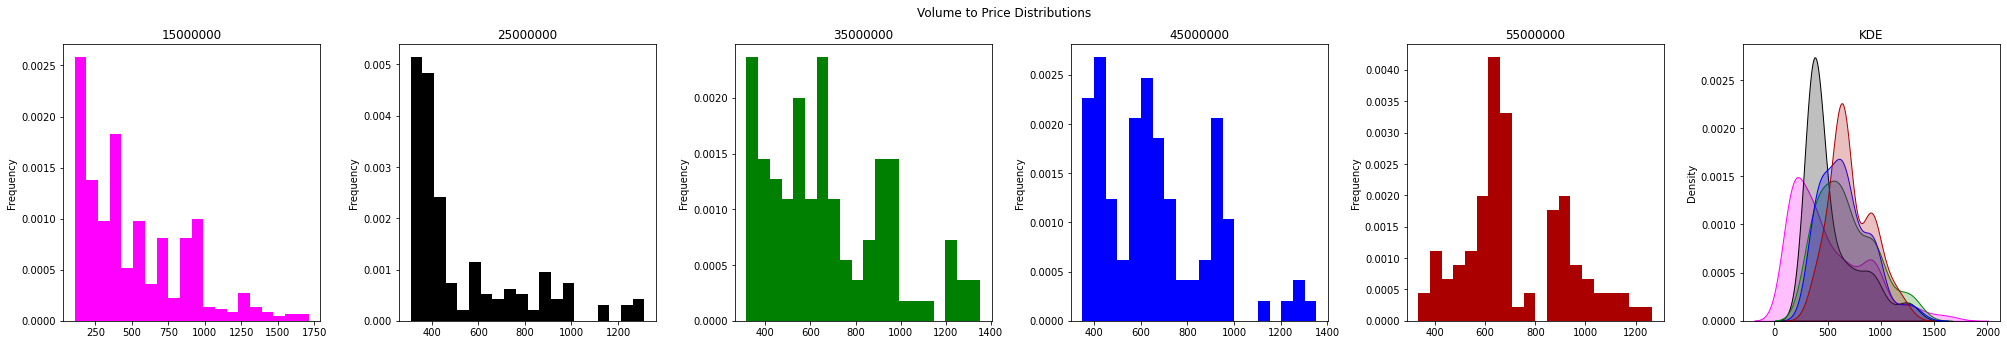

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(28,5))
        
(sample1['High']+sample1['Low']/2).plot(kind="hist", ax=ax[0], bins=20, color='#FF00FF', density=True)
ax[0].set_title("15000000")

(sample2['High']+sample2['Low']/2).plot(kind="hist", ax=ax[1], bins=20, color="#000000", density=True)
ax[1].set_title("25000000")

(sample3['High']+sample3['Low']/2).plot(kind="hist", ax=ax[2], bins=20, color="g", density=True)
ax[2].set_title("35000000")

(sample4['High']+sample4['Low']/2).plot(kind="hist", ax=ax[3], bins=20, color="b", density=True)
ax[3].set_title("45000000")

(sample5['High']+sample5['Low']/2).plot(kind="hist", ax=ax[4], bins=20, color="#AA0000", density=True)
ax[4].set_title("55000000")

sns.kdeplot((sample1['High']+sample1['Low']/2), shade=True, label="1.5 billion", color=('#FF00FF'))
sns.kdeplot((sample2['High']+sample2['Low']/2), shade=True, label="2.5 billion", color="#000000")
sns.kdeplot((sample3['High']+sample3['Low']/2), shade=True, label="3.5 billion", color="g")
sns.kdeplot((sample4['High']+sample4['Low']/2), shade=True, label="4.5 billion", color='b')
sns.kdeplot((sample5['High']+sample5['Low']/2), shade=True, label="5.5 billion",  color="#AA0000")
ax[5].set_title("KDE")

plt.suptitle("Volume to Price Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We can see from the KDE(Kernel Density Estimation) graph that the greater the price, the bigger the volume, and the price of bitcoin to volume comparison is as follows, 5.5 billion > 4.5 billion > 3.5 billion > 2.5 billion > 1.5 billion

In [ ]:
f_stats, p_values = f_oneway((sample1['High']+sample1['Low']/2).values, (sample2['High']+sample2['Low']/2).values, (sample3['High']+sample3['Low']/2).values, (sample4['High']+sample4['Low']/2).values, (sample5['High']+sample5['Low']/2).values)
p_values

5.42692928882044e-13

Since the p value is very close to 0 (0.00000000000542692928882044) and under 0.05, we can reject ($\large{H_0}$) and safely say that price is affected by volume.

#Machine Learning

Converting continious data(Average price) to categorical. 
A scale of 1 to 10 (Representing 1 is the lowest and 10 is the highest). We categorized the data by multiplying range by 2 at each category (k<data<n; k and n is multiplied by 2 at each category). New nested list created using the categories.

In [ ]:

category = []
category1 = []
category2 = []
category3 = []
category4 = []
category5 = []
category6 = []
category7 = []
category8 = []
category9 = []
category10 = []

categoryy1 = df[df['Open'] < 200]
categoryy2 = df[(200<=  df['Open']) & (df['Open']< 400)]
categoryy3 = df[(400<=  df['Open']) & (df['Open']< 800)]
categoryy4 = df[(800<=  df['Open']) & (df['Open']< 1600)]
categoryy5 = df[(1600<=  df['Open']) & (df['Open']< 3200)]
categoryy6 = df[(3200<=  df['Open']) & (df['Open']< 6400)]
categoryy7 = df[(6400<=  df['Open']) & (df['Open']< 12800)]
categoryy8 = df[(12800<=  df['Open']) & (df['Open']< 25600)]
categoryy9 = df[(25600<=  df['Open']) & (df['Open']< 51200)]
categoryy10 = df[51200<=  df['Open']]


for row in df_ml['Open']:
   if row < 200: 
     category.append(1)
     category1.append(row)
   elif (row) < 400 and (row >= 200):
    category.append(2)
    category2.append(row)
   elif (row) < 800 and (row >= 400): 
     category.append(3)
     category3.append(row)
   elif (row) < 1600 and (row >= 800):
    category.append(4)
    category4.append(row)
   elif (row) < 3200 and (row >= 1600): 
    category.append(5)
    category5.append(row)
   elif (row) < 6400 and (row >= 3200):
    category.append(6)
    category6.append(row)
   elif (row) < 12800 and (row >= 6400): 
     category.append(7)
     category7.append(row)
   elif (row) < 25600 and (row >= 12800):
    category.append(8)
    category8.append(row)
   elif (row) < 51200 and (row >= 25600):
    category.append(9)
    category9.append(row)
   elif (row >= 51200):
    category.append(10)
    category10.append(row)

allcategories=[category1,category2,category3,category4,category5,category6,category7,category8,category9,category10]

df_ml['Price Category'] = category
#df_ml=df_ml.sample(frac=1)
df_ml.tail()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,BTC Volume,Total Supply,Volatility,Average Price,Price Category
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,1.142547e+06,1.874649e+07,347.448412,33723.324384,9
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,7.033452e+05,1.874724e+07,814.127040,34261.484882,9
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,7.063156e+05,1.874799e+07,622.214900,34976.672316,9
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,7.918435e+05,1.874878e+07,1538.341974,34515.173443,9
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11,7.740941e+05,1.874969e+07,511.683796,33979.351553,9


In [ ]:
def sampling_2d(mean, std, n, label):
  """
  this function returns 2d sample of the parameters

  """
  # setting the intervals
  intervalx = np.random.normal(loc=mean, scale=std, size=n).reshape(-1,1)
  intervaly = np.random.normal(loc=mean, scale=std, size=n).reshape(-1,1)

  # classing all the labels as one
  labels = np.repeat(label, n).reshape(-1,1)

  # merging the labels that we assigned and observation
  sample2d = np.hstack([intervalx, intervaly, labels])

  return sample2d

An example only using Opening Price.

In [ ]:
print("Means of samples: ")
print(categoryy1["Open"].mean())
print(categoryy2["Open"].mean())
print(categoryy3["Open"].mean())
print(categoryy4["Open"].mean())
print(categoryy5["Open"].mean())
print(categoryy6["Open"].mean())
print(categoryy7["Open"].mean())
print(categoryy8["Open"].mean())
print(categoryy9["Open"].mean())
print(categoryy10["Open"].mean())

print("\n")
print("Standard deviations of samples: ")
print(categoryy1["Open"].std())
print(categoryy2["Open"].std())
print(categoryy3["Open"].std())
print(categoryy4["Open"].std())
print(categoryy5["Open"].std())
print(categoryy6["Open"].std())
print(categoryy7["Open"].std())
print(categoryy8["Open"].std())
print(categoryy9["Open"].std())
print(categoryy10["Open"].std())

Means of samples: 
119.33914646457981
286.802752262404
562.8662144266273
1035.6658464058366
2441.4663330078124
4662.467973172634
8871.763394242587
16785.043677208367
38461.467632037
57028.76176745633


Standard deviations of samples: 
23.6021126409423
57.83417857725786
110.50197851146822
173.24548618667117
342.27903079502397
1013.0115449085656
1582.938477864403
2918.4168307617465
6359.536593663335
2704.806984072264


Randomly generating data and plotting the graph of clustered samples.

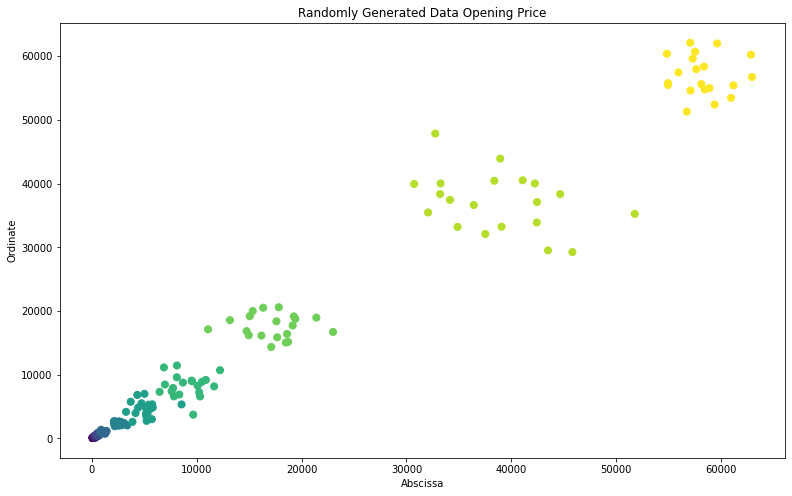

In [ ]:
# the number of observations
number_obs = 20
# the number of classes
number_classes = 10
# fixing the random with using seed function
np.random.seed(42)

# parameters of our sample
opmeans = [categoryy1["Open"].mean(), categoryy2["Open"].mean(), categoryy3["Open"].mean(), categoryy4["Open"].mean(), categoryy5["Open"].mean(),categoryy6["Open"].mean(), categoryy7["Open"].mean(), categoryy8["Open"].mean(), categoryy9["Open"].mean(), categoryy10["Open"].mean()]
opstd = [categoryy1["Open"].std(), categoryy2["Open"].std(), categoryy3["Open"].std(), categoryy4["Open"].std(), categoryy5["Open"].std(),categoryy6["Open"].std(), categoryy7["Open"].std(), categoryy8["Open"].std(), categoryy9["Open"].std(), categoryy10["Open"].std()]

d_list = []
for label in range(number_classes):
  sample2d = sampling_2d(opmeans[label], opstd[label], number_obs, label)
  d_list.append(sample2d)

data = np.vstack(d_list)

fig, ax = plt.subplots(1, 1, figsize=(13,8))

ax.scatter(data[:,0], data[:,1], c=data[:,2], s=50)
ax.set_title("Randomly Generated Data Opening Price")
plt.xlabel("Abscissa")
plt.ylabel("Ordinate")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Selection of a random point to predict to use KNN method.

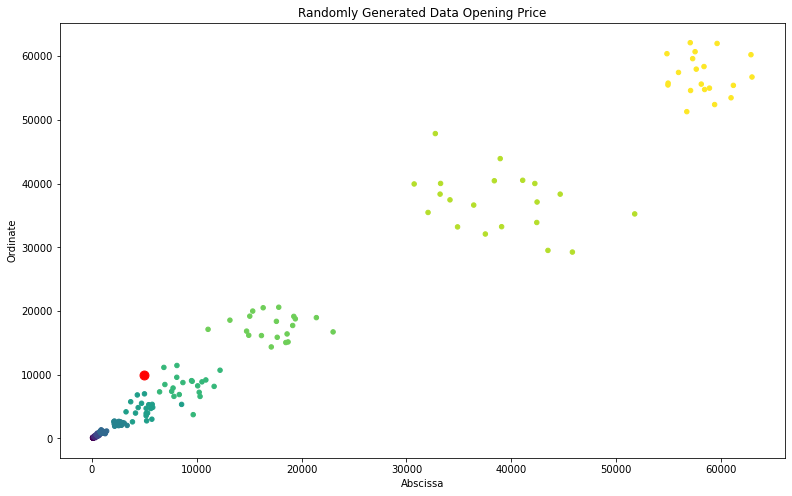

In [ ]:
# set the hyperparameter k
k=3
# generate the model
model = KNeighborsClassifier(k, metric="euclidean")

# extract features and labels from the data
features = data[:, :2]
labels = data[:, 2]

# fit data
model.fit(features, labels)

# new data point
d = np.array([[5000,10000]])

fig, ax = plt.subplots(1, 1, figsize=(13,8))
# let's visualize its location on the chart

ax.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
ax.scatter(d[:,0], d[:,1], s=80, c="red")
ax.set_title("Randomly Generated Data Opening Price")
plt.xlabel("Abscissa")
plt.ylabel("Ordinate")
plt.show()

Prediction of which cluster does the point belong to.

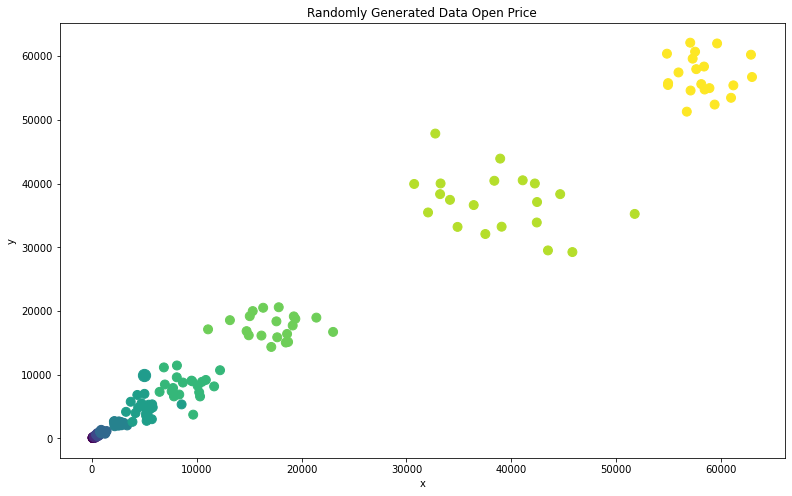

In [ ]:
pred = model.predict(d)

fig, ax = plt.subplots(1, 1, figsize=(13,8))

ax.scatter(data[:,0], data[:,1], c=data[:,2], s=80)
ax.scatter(d[:,0], d[:,1], s=150, c="#209c8c")
ax.set_title("Randomly Generated Data Open Price")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Getting to classification with kNN

In [ ]:
df_ml["Price Category"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
np.array([1, 2, 3, 4, 5, 6,7,8,9,10], dtype=object)

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

We have 10 categories for prices so we will have 10 clusters.

Dropping collumns and splitting the data.


In [ ]:
y = df_ml["Price Category"]
df_ml.drop("SNo", inplace=True, axis=1)
df_ml.drop("Name", inplace=True, axis=1)
df_ml.drop("Symbol", inplace=True, axis=1)
df_ml.drop("Date", inplace=True, axis=1)
df_ml.drop("High", inplace=True, axis=1)
df_ml.drop("Low", inplace=True, axis=1)
df_ml.drop("Marketcap", inplace=True, axis=1)
df_ml.drop("Close", inplace=True, axis=1)
df_ml.drop("BTC Volume", inplace=True, axis=1)
df_ml.drop("Total Supply", inplace=True, axis=1)
df_ml.drop("Volatility", inplace=True, axis=1)
df_ml.drop("Average Price", inplace=True, axis=1)
X = df_ml

X.head()

,Open,Volume,Price Category
0,134.444000,0.0,1
1,144.000000,0.0,1
2,139.000000,0.0,1
3,116.379997,0.0,1
4,106.250000,0.0,1


In [ ]:
df_ml.head()
df_ml.tail()

,Open,Volume,Price Category
2986,33549.600177,3.872897e+10,9
2987,33854.421362,2.438396e+10,9
2988,34665.564866,2.492431e+10,9
2989,35284.344430,2.672155e+10,9
2990,33723.509655,2.650126e+10,9


At the initial data values volumes are generally 0, because of the dataset that we got from Kaggle.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

Create model for each k (1, 2, 3...14) and train them. After that we will obtain the accuracy score.


In [ ]:
accuracy = []
K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14]
for k in K:
  model = KNeighborsClassifier(k, metric="euclidean")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  acscore = accuracy_score(y_val, y_pred)
  accuracy.append(acscore)


Plotting accuracy graph.

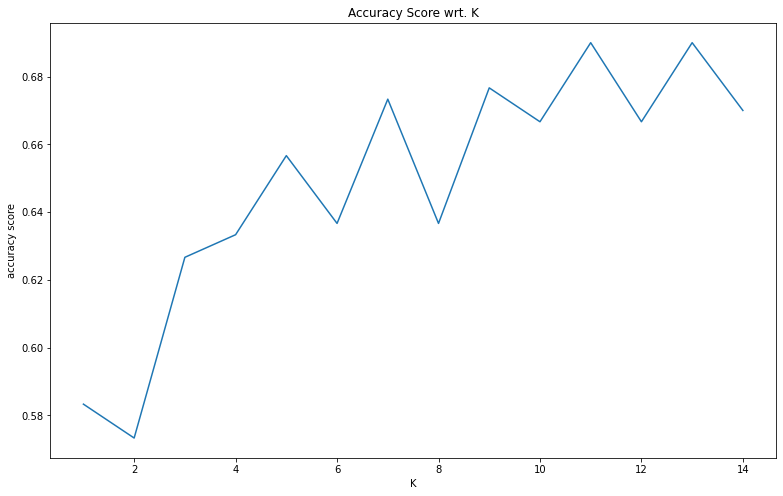

In [ ]:
plt.figure(figsize=(13, 8))
plt.plot(K, accuracy)
plt.xlabel("K")
plt.ylabel("accuracy score")
plt.title("Accuracy Score wrt. K")
plt.show()

We see that the best accuracy is obtained when k is 13 so we will

make another model with k = 13.
train that model with our test data
check our accuracy score with the test data

KNN never finds an optimal solution. Based on euclidean distance usually CPU finds the "K", but this K value is never optimal. Accuracy is generally correlated to the data size. This correlation is directly proportional here. KNN is used in classification.

In [ ]:
model = KNeighborsClassifier(13, metric="euclidean")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acscore = accuracy_score(y_test, y_pred)
print("Accuracy score is: ", acscore)

Accuracy score is:  0.7023411371237458


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
import random
from copy import deepcopy
import matplotlib.lines as mlines

# interactivity
from ipywidgets import interact

sns.set_style("darkgrid")

%matplotlib inline

Importing required libraries to use for K-Means Clustering.

In [ ]:
# importing Kmeans
from sklearn.cluster import KMeans
# finding the distances between centroid and data points
from scipy.spatial import distance

Choosing 2 categories out of the 10 we created to cluster. Since data entries are not the same between 2 categories, we choose the smallest size between these 2 categories and determine it as our data size.

In [ ]:
# set seed for reproduction
data12= pd.DataFrame()

random.seed(10)

random1 = random.randint(1,(len(opmeans)+1))

random.seed(4)
random2 = random.randint(1,(len(opmeans)+1))
# samples from two different normal distributions

random1=random1-1
random2=random2-1

firstrandomsize=len(allcategories[random1]) 
secondrandomsize= len(allcategories[random2])

if(firstrandomsize> secondrandomsize):
  randomizingsize = secondrandomsize
elif(firstrandomsize< secondrandomsize):
  randomizingsize = firstrandomsize
else:
  randomizingsize=firstrandomsize

Xlist=[]
Ylist=[]

for i in range(randomizingsize):
  Xlist.append(allcategories[random1][i])
  Ylist.append(allcategories[random2][i])



data12['X'] = Xlist
data12['Y'] = Ylist


data15 = data12.to_numpy()
np.random.seed(0)


s1 = np.random.normal(loc=opmeans[random1], scale=opstd[random1], size=[len(opmeans),2])
s2 = np.random.normal(loc=opmeans[random2], scale=opstd[random2], size=[len(opmeans),2])

# merge two samples
data = np.vstack([s1, s2])

Function for clustering data. We assign the objects to their closest cluster center and calculate the new cluster centers. At each iteration, new, more optimal cluster centers are calculated.

In [ ]:
def clustering(num_iterations=0):

    # x coordinates of centroids
    cx = [11,3]
    # y coordinates of centroids
    cy = [1,11]

    fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    # let's the plot data points
    axs[0].scatter(s1[:,0], s1[:, 1], label="cluster1")
    axs[0].scatter(s2[:,0], s2[:, 1], label="cluster2")

    # and initial centroids
    axs[0].scatter(cx[0], cx[1], marker="x", s=150, c="r")
    axs[0].scatter(cy[0], cy[1], marker="x", s=150, c="b")
    
    axs[0].legend()
    axs[0].set_title("Original Clusters and Centroids")
    
    # merge centroid coordinates
    centroids = np.vstack([cx, cy])
    # store previous centroids
    old_centroids = centroids.copy()
    
    # cluster labels
    labels = np.zeros(data.shape[0])
    
    # iterations come from the slider
    for _ in range(num_iterations):

        # iterate over the data with indices
        for i, d in enumerate(data):

            # store distances to each centroid
            distances = np.zeros(len(centroids))

            # compute the distance for each centroid
            for c, _ in enumerate(centroids):
                # euclidean distance between data point and centroid
                distances[c] = distance.euclidean(data[i], centroids[c])

            labels[i] = distances.argmin()
        
        # store previous centroids
        old_centroids = deepcopy(centroids)

        # update centroids by taking the mean of each cluster
        for c in range(len(centroids)):
            centroids[c] = data[labels == c].mean(axis=0)
            
    # plot data points
    axs[1].scatter(data[:,0], data[:, 1], c=np.where(labels == 0, "c", "m"))

    # and centroids
    axs[1].scatter(centroids[0][0], centroids[0][1], 
                   marker="x", s=150, c="c")
    axs[1].scatter(centroids[1][0], centroids[1][1], 
                   marker="x", s=150, c="m")
    
    # previous one as well
    axs[1].scatter(old_centroids[0][0], old_centroids[0][1], 
                   marker="x", s=150, c="c", alpha=0.3)
    axs[1].scatter(old_centroids[1][0], old_centroids[1][1], 
                   marker="x", s=150, c="m", alpha=0.3)    
    
    curr_cent = mlines.Line2D([], [], color='b', marker='x', c="black",
                          markersize=15, label='Shifted Location', linestyle='None')
    prev_cent = mlines.Line2D([], [], color='b', marker='x', c="black",
                          markersize=15, label='Previous Location', linestyle='None', alpha=0.3)
    
    axs[1].legend(handles=[curr_cent, prev_cent])
    axs[1].set_title("Number of Iterations: {}".format(num_iterations))
    
    plt.show()
    
interact(clustering, num_iterations=(0,10))

interactive(children=(IntSlider(value=0, description='num_iterations', max=10), Output()), _dom_classes=('widg…

<function __main__.clustering>

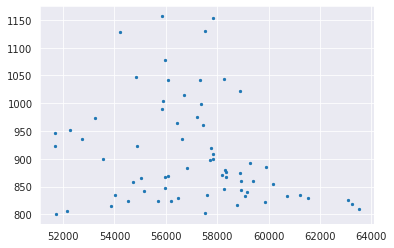

In [ ]:
plt.scatter(data15[:, 0], data15[:, 1], s=5)
plt.show()

Creating a KMeans model with clustering (k=5) for testing.

In [ ]:
# create kmeans model and set k as 5
model = KMeans(n_clusters=5)
model.fit(data15)

KMeans(n_clusters=5)

Plotting the 5 clusters created.

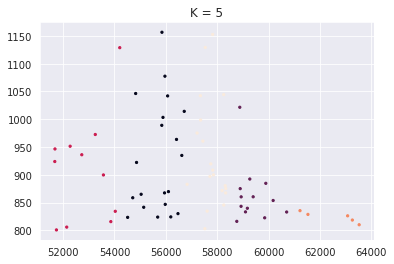

In [ ]:
# get the resulting the cluster labels
labels = model.labels_

plt.scatter(data15[:, 0], data15[:, 1], c=labels, s=5)
plt.title("K = 5")
plt.show()

Plotting the Elbow Method to find the optimal number of clusters we are going to use.

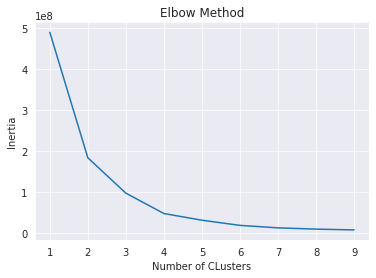

In [ ]:
# define number of cluster range
n_clusters_range = np.arange(1, 10)
# store intra cluster variation value
intra_cluster_var = []

for k in n_clusters_range:
    model = KMeans(n_clusters=k)
    model.fit(data15)
    
    # append intra cluster variation, i.e. inertia attribute in the model
    intra_cluster_var.append(model.inertia_)
    
plt.plot(n_clusters_range, intra_cluster_var)
plt.xlabel("Number of CLusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

Choosing our number of clusters as 10. Using our data, creating and plotting the said clusters.

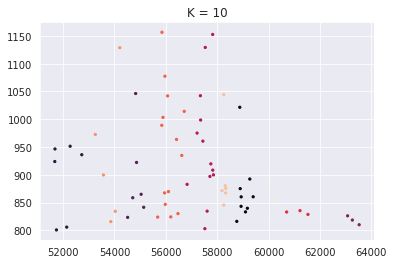

In [ ]:
# clustering with k set to 10
model = KMeans(n_clusters=10)
model.fit(data15)

cluster_labels = model.labels_

plt.scatter(data15[:, 0], data15[:, 1], c=cluster_labels, s=5)
plt.title("K = 10")
plt.show()

Importing library to use a dendrogram.

In [ ]:
# agglomerative clustering and dendogram visualization
from scipy.cluster.hierarchy import dendrogram, linkage

Dendrogram(Tree Diagram); visualization of our result.

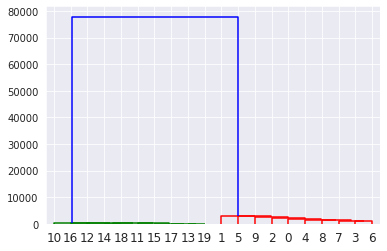

In [ ]:
result = linkage(data, "single")
# plot the dendogram
dendrogram(result);